# Linear Regression - Predict RBIs

## Overview
* Create a Linear Regression Model that is able to predict RBI totals based off other batting statistics from 1955-2018

## Import Libraries

In [2]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Data

In [3]:
# Batting data from 1955-2018
batting = pd.read_csv('Batting_1955_2018.csv')

## Check Data

In [4]:
# View the first 5 rows of data
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aaronha01,1955,1,ML1,NL,153,602,105,189,37,...,106,3,1,49,61,5,3,7,4,20
1,aberal01,1955,1,DET,AL,39,17,0,1,0,...,0,0,0,0,9,0,0,2,0,1
2,abernte02,1955,1,WS1,AL,40,26,1,4,0,...,0,0,0,0,6,0,0,4,0,1
3,abramca01,1955,1,BAL,AL,118,309,56,75,12,...,32,2,8,89,69,2,3,3,3,6
4,adamsbo03,1955,1,CIN,NL,64,150,23,41,11,...,20,2,0,20,21,1,3,2,1,3


In [5]:
# View rows and columns info
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68397 entries, 0 to 68396
Data columns (total 22 columns):
playerID    68397 non-null object
yearID      68397 non-null int64
stint       68397 non-null int64
teamID      68397 non-null object
lgID        68397 non-null object
G           68397 non-null int64
AB          68397 non-null int64
R           68397 non-null int64
H           68397 non-null int64
2B          68397 non-null int64
3B          68397 non-null int64
HR          68397 non-null int64
RBI         68397 non-null int64
SB          68397 non-null int64
CS          68397 non-null int64
BB          68397 non-null int64
SO          68397 non-null int64
IBB         68397 non-null int64
HBP         68397 non-null int64
SH          68397 non-null int64
SF          68397 non-null int64
GIDP        68397 non-null int64
dtypes: int64(19), object(3)
memory usage: 11.5+ MB


In [6]:
# Some statistical information
batting.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,68397.000000,68397.000000,68397.000000,68397.000000,68397.000000,68397.000000,68397.000000,68397.000000,68397.000000,68397.000000,68397.000000,68397.000000,68397.000000,68397.000000,68397.000000,68397.000000,68397.000000,68397.000000,68397.000000
mean,1991.091042,1.080895,51.968069,129.629808,16.748264,33.515564,6.020045,0.805913,3.487229,15.785517,2.299706,1.095647,12.426364,23.170592,1.098996,1.005146,1.416700,1.052722,2.908183
std,17.888541,0.288212,46.832529,182.913048,26.672533,50.969020,9.717678,1.773642,7.162240,26.026647,6.538344,2.489971,20.632695,32.345328,2.764154,2.247306,2.621944,1.954120,4.720508
min,1955.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1977.000000,1.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1993.000000,1.000000,35.000000,31.000000,2.000000,5.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2007.000000,1.000000,79.000000,201.000000,23.000000,49.000000,9.000000,1.000000,3.000000,21.000000,1.000000,1.000000,17.000000,34.000000,1.000000,1.000000,2.000000,1.000000,4.000000
max,2018.000000,5.000000,165.000000,716.000000,152.000000,262.000000,59.000000,23.000000,73.000000,165.000000,130.000000,42.000000,232.000000,223.000000,120.000000,50.000000,40.000000,18.000000,36.000000


In [7]:
# Column names
batting.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

## Exploratory Data Analysis

Text(0.5,1,'RBI Distribution Plot')

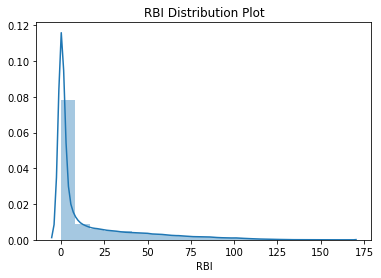

In [157]:
# Distribution plot of RBIs
sns.distplot(batting['RBI'], bins = 20).set_title('RBI Distribution Plot')

#### The distribution plot shows that the majority of players had between 0 and 10 RBIs

In [127]:
# Correlation of batting statistics
batting.corr()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
yearID,1.000000,0.010113,-0.040944,-0.054357,-0.027616,-0.044551,0.018384,-0.092245,0.014434,-0.021719,-0.002937,-0.065436,-0.051465,0.037504,-0.081817,0.065906,-0.138956,-0.036445,-0.046442
stint,0.010113,1.000000,-0.138156,-0.104396,-0.097942,-0.100177,-0.096669,-0.069133,-0.078321,-0.093697,-0.059263,-0.068601,-0.091136,-0.100524,-0.071552,-0.070033,-0.076494,-0.080417,-0.089787
G,-0.040944,-0.138156,1.000000,0.932475,0.893012,0.917768,0.873173,0.655943,0.733695,0.866524,0.535536,0.634740,0.840789,0.838593,0.609537,0.611400,0.357845,0.755607,0.818276
AB,-0.054357,-0.104396,0.932475,1.000000,0.964137,0.990388,0.944042,0.710418,0.792784,0.932113,0.589784,0.683962,0.886922,0.891289,0.640254,0.654782,0.367447,0.808292,0.877057
R,-0.027616,-0.097942,0.893012,0.964137,1.000000,0.973929,0.938538,0.715716,0.844336,0.940145,0.633049,0.689970,0.914131,0.869890,0.648608,0.666196,0.301242,0.789455,0.823491
H,-0.044551,-0.100177,0.917768,0.990388,0.973929,1.000000,0.955088,0.719878,0.800657,0.940826,0.598819,0.686114,0.883169,0.861454,0.654090,0.651422,0.331918,0.808558,0.871356
2B,0.018384,-0.096669,0.873173,0.944042,0.938538,0.955088,1.000000,0.647296,0.797182,0.923957,0.534641,0.614495,0.853046,0.849187,0.632584,0.653633,0.262828,0.791294,0.838611
3B,-0.092245,-0.069133,0.655943,0.710418,0.715716,0.719878,0.647296,1.000000,0.466384,0.612351,0.616807,0.650794,0.597148,0.591149,0.411375,0.418058,0.322795,0.532418,0.540388
HR,0.014434,-0.078321,0.733695,0.792784,0.844336,0.800657,0.797182,0.466384,1.000000,0.923256,0.348523,0.413676,0.808149,0.826090,0.664430,0.598573,0.058036,0.702519,0.716856
RBI,-0.021719,-0.093697,0.866524,0.932113,0.940145,0.940826,0.923957,0.612351,0.923256,1.000000,0.465971,0.553437,0.883628,0.872299,0.698182,0.644947,0.201692,0.832239,0.849507


#### The closer to 1, the greater the correlation between the 2 metrics

Text(0.5,1,'Correlation Plot')

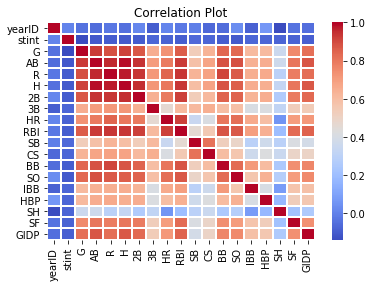

In [126]:
sns.heatmap(batting.corr(), cmap = 'coolwarm', linecolor='white', linewidths=1).set_title('Correlation Plot')

#### This is a visual representation of the correlation table above

## Train the Linear Regression Model

### X and y Arrays

In [128]:
# Model input
# Define the key features the model will take into consideration in order to make predictions
X = batting[['yearID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH','SF', 'GIDP']]

# Model output
# Define what the model is attempting to predict
y = batting['RBI']

### Train Test Split

In [38]:
# Train test split library
from sklearn.model_selection import train_test_split

In [43]:
# Split the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

### Create and Train the Model

In [46]:
# Import linear regression model
from sklearn.linear_model import LinearRegression

In [47]:
# Create an instance of the linear regression model
lm = LinearRegression()

In [49]:
# Train/fit the linear regression model to the training data
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predict the Test Data

In [163]:
# Predict the results of the test data
predictions = lm.predict(X_test)

Text(0.5,1,'Predicted Values vs Actual Values')

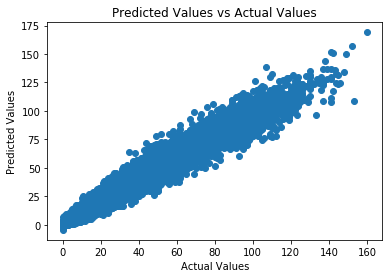

In [171]:
# Visualize the real test values versus the predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs Actual Values')

#### The plot shows a relatively decent model prediction due to the slope of the line and the limited amount of noise of the line

## Evaluate the Linear Regression Model

### Regression Evaluation Metrics
**Mean Absolute Error** (MAE) represents the average of the difference between the actual values and predicted values
* want this to approach 0

**Mean Squared Error** (MSE) represents the average of the squared errors
* want this to approach 0

**Root Mean Squared Error** (RMSE) represents the square root of the average of the squared errors
* want this to approach 0

**R-squared** (r2) represents how well the predicted values fit compared to the actual values
* want this to approach 1

In [ ]:
# Import the regression evaluation metrics library
from sklearn import metrics

In [170]:
# Print out the regression evaluation metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2:', metrics.explained_variance_score(y_test, predictions))

MAE: 2.21277261669
MSE: 17.1789951034
RMSE: 4.1447551319
r2: 0.974747739576


#### The regression evaluation metrics show that the linear regression model did a good job predicting the results

### Residuals Histogram Plot
**Residuals** are the difference between the actual values and the predicted values

**Residuals Histogram Plot** should be normally distributed

Text(0.5,1,'Model Residuals (Actual Values - Predicted Values)')

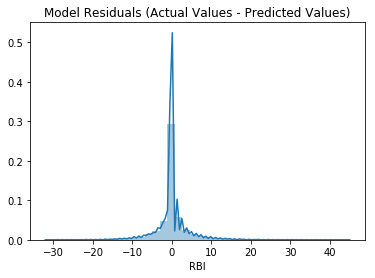

In [172]:
# Residual histogram plot
sns.distplot((y_test - predictions), bins = 40).set_title('Model Residuals (Actual Values - Predicted Values)')

#### The residual histogram plot appears to be normally distributed for the most part which means the model was a decent choice for the data

### Coefficients Evaluation

In [174]:
# Create a dataframe of the coefficients used in the linear regression model
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
yearID,-0.007443
G,0.007334
AB,-0.014412
R,-0.113685
H,0.261922
2B,0.266034
3B,0.190709
HR,1.586927
SB,-0.072055
CS,-0.135538


#### Interpreting the coefficients
* holding all other features fixed, a 1 unit increase in Years is associated with an increase of -0.007443 RBIs
* **holding all other features fixed, a 1 unit increase in Games is associated with an increase of 0.007334 RBIs**
* holding all other features fixed, a 1 unit increase in At Bats is associated with an increase of -0.014412 RBIs
* holding all other features fixed, a 1 unit increase in Runs is associated with an increase of -0.113685 RBIs
* **holding all other features fixed, a 1 unit increase in Hits is associated with an increase of 0.261922 RBIs**
* **holding all other features fixed, a 1 unit increase in Doubles is associated with an increase of 0.266034 RBIs**
* **holding all other features fixed, a 1 unit increase in Triples is associated with an increase of 0.190709 RBIs**
* **holding all other features fixed, a 1 unit increase in Home Runs is associated with an increase of 1.586927 RBIs**
* holding all other features fixed, a 1 unit increase in Stolen Bases is associated with an increase of -0.072055 RBIs
* holding all other features fixed, a 1 unit increase in Caught Stealing is associated with an increase of -0.135538 RBIs
* **holding all other features fixed, a 1 unit increase in Walks is associated with an increase of 0.058100 RBIs**
* **holding all other features fixed, a 1 unit increase in Strikeouts is associated with an increase of 0.008075 RBIs**
* **holding all other features fixed, a 1 unit increase in Intentional Walks is associated with an increase of 0.098256 RBIs**
* holding all other features fixed, a 1 unit increase in Hit By Pitches is associated with an increase of -0.044346 RBIs
* holding all other features fixed, a 1 unit increase in Sacrifice Bunts is associated with an increase of -0.012730 RBIs
* **holding all other features fixed, a 1 unit increase in Sacrifice Flies is associated with an increase of 1.602457 RBIs**
* **holding all other features fixed, a 1 unit increase in Grounding Into Double Play is associated with an increase of 0.270112 RBIs**